# VS Code Environment

We have covered the basics about WSL and Linux environment in general. Many
users still prefer a GUI environment for their development. Visual Studio Code
(VS Code) is a popular and powerful code editor that runs on Windows and, at the
same time, works with WSL.

We will show how to configure VS Code to work with WSL.

```{note}
VS Code is different from VS (Visual Studio). VS is a full-featured IDE, while
VS Code is a lightweight editor.
```



## Installation

One can install VS Code by following the instruction on the [VS Code
website](https://code.visualstudio.com). You will follow the standard procedure
for installing a Windows software.



## Getting Started Guide

The following is a screenshot of VS Code at its first run. You will be guided to select the Color Theme of the editor. 

It is highly recommended to complete the "Getting Started with VS Code" guide. You will learn many useful points, such as changing settings and the keyboard shortcut for the command-line palette.

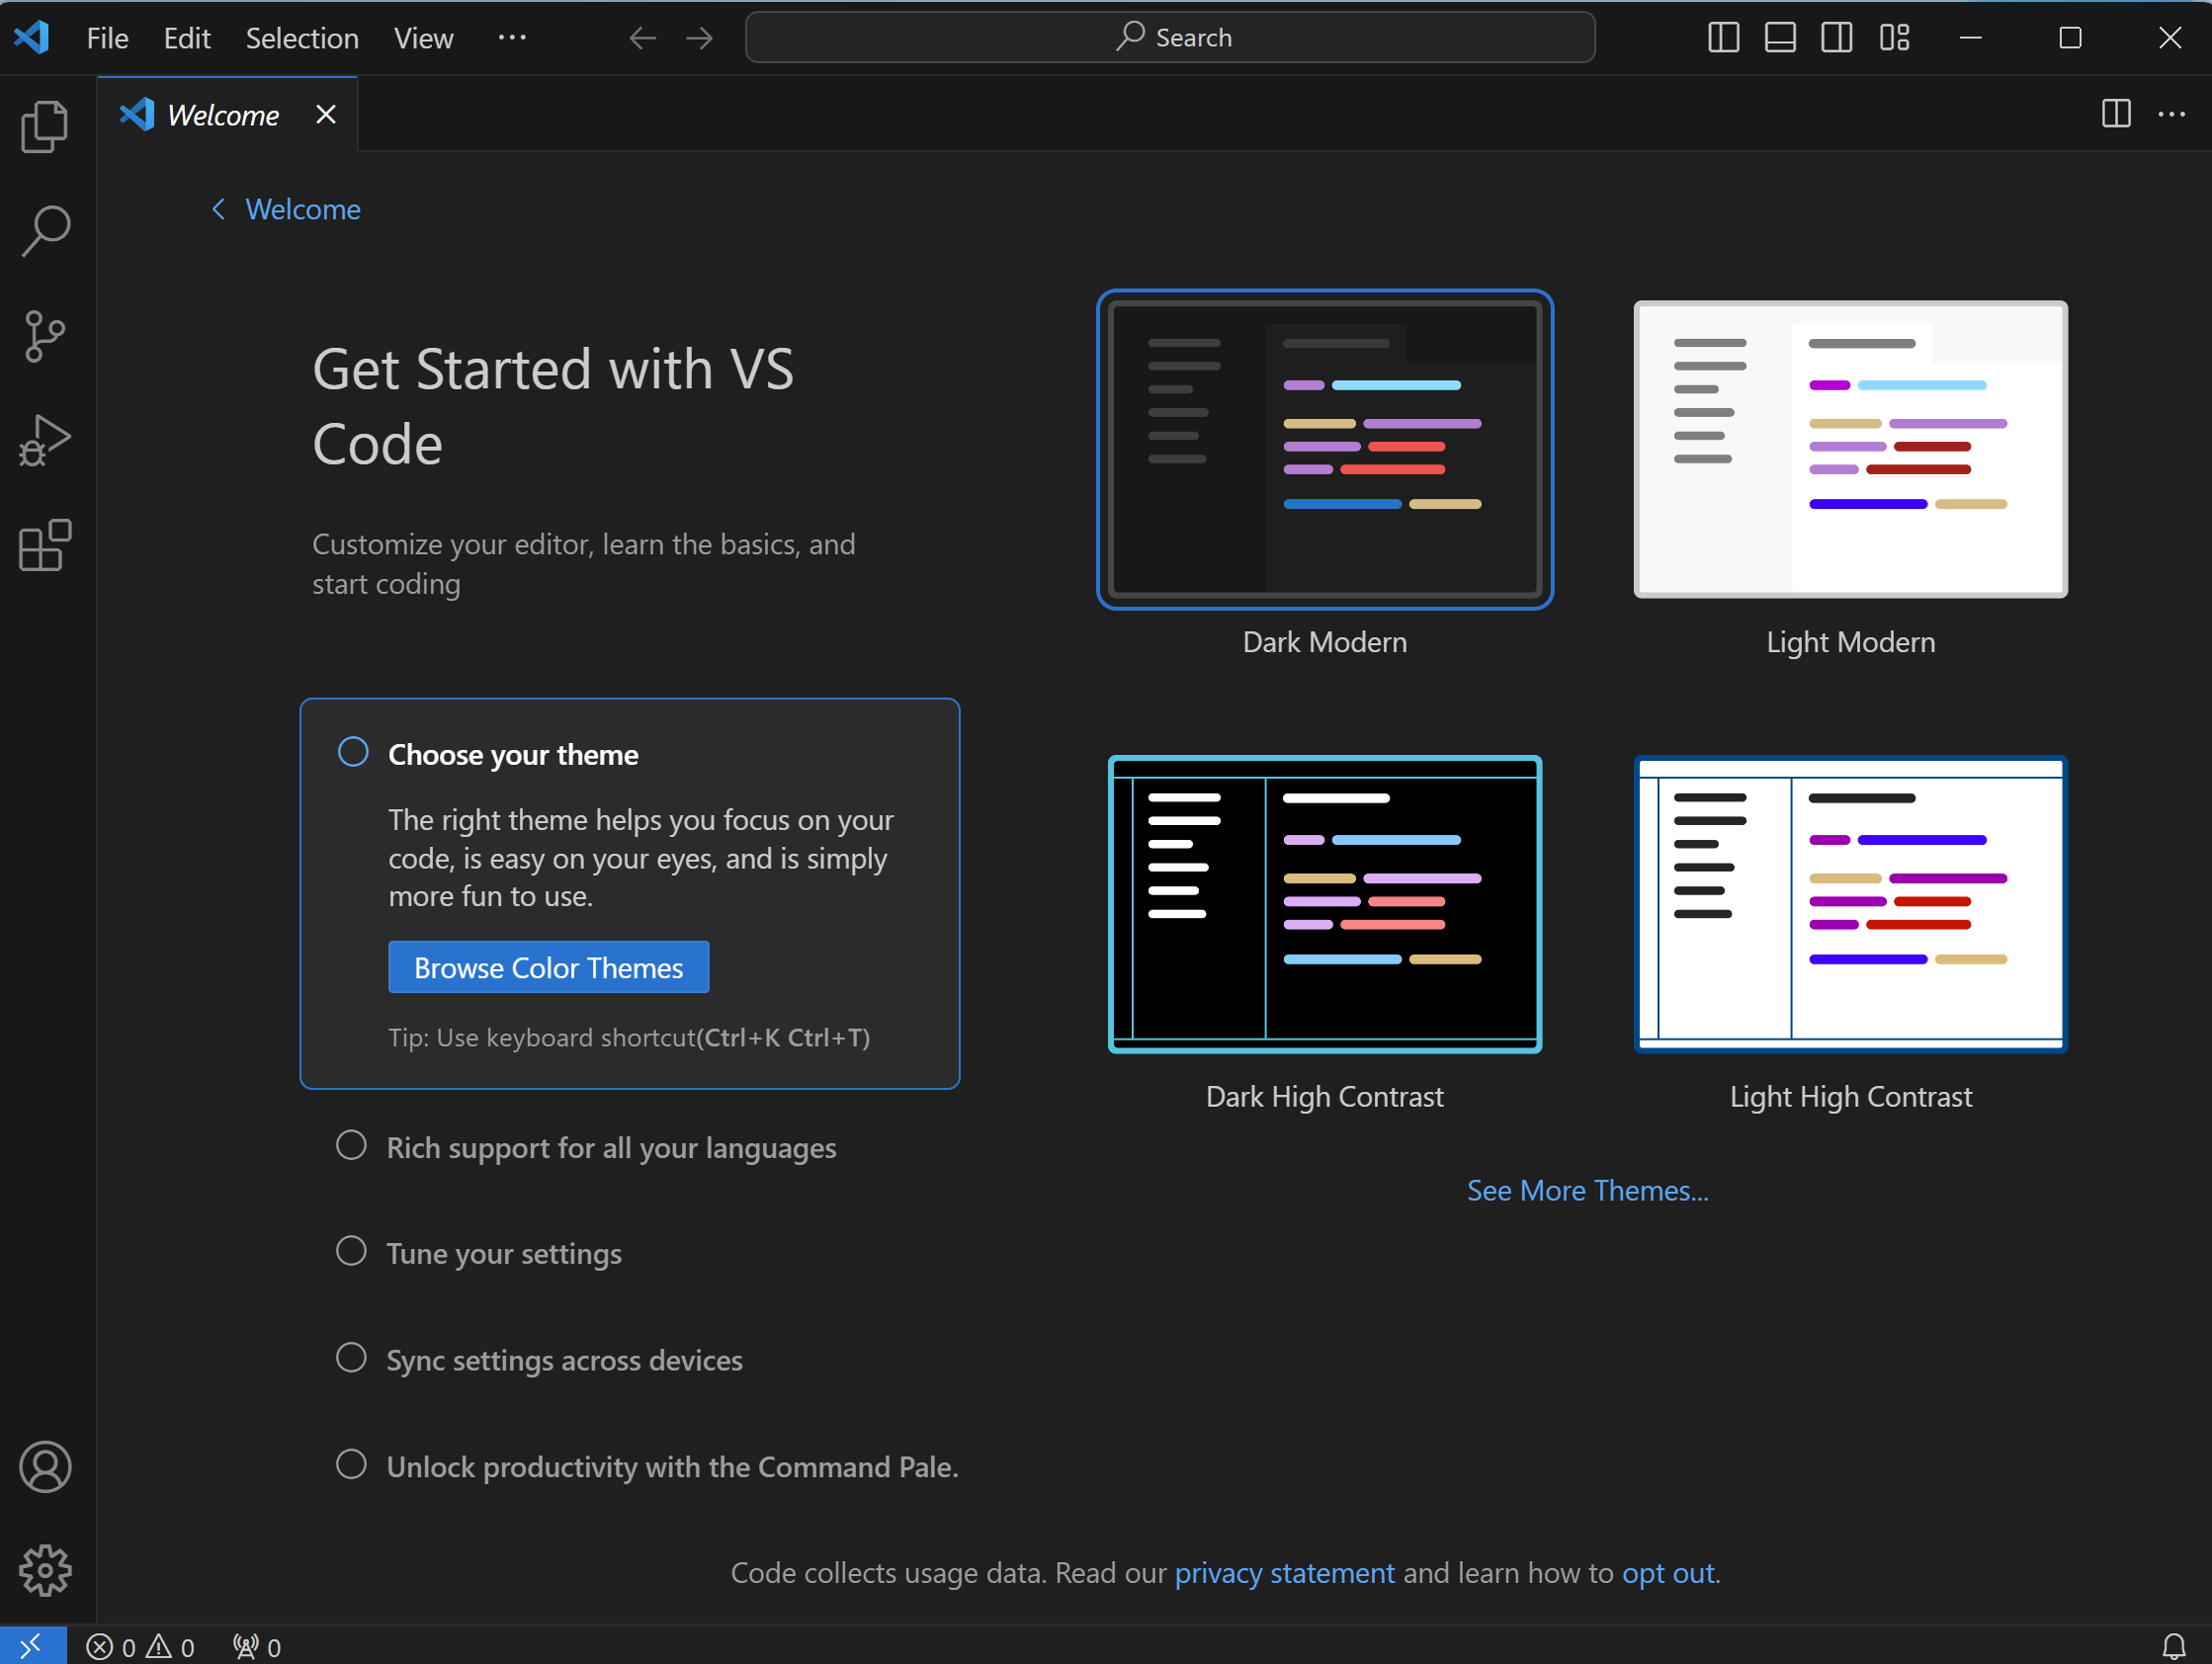

```{admonition} Exercise

What's the keyboard shortcut for invoking command-line palette?

```


## Extensions and WSL Remote

### WSL Remote

VS Code is more than a text editor. One can install extensions to enhance the
functionality of the editor.

Click on the Extensions icon on the left side bar to open the Extensions view. After several seconds, a list of popular extensions will be shown.

Click on the "Install" button to install "Python" and "Jupyter".

In the search box, search for "Remote" and install the package "Remote Development". Make sure you get the right one; there are several with similar names.

When done, on the left sidebar, you will see some new icons. Click "Remote Explore" and find the "WSL Target" group as shown below. Hover over it, and click
the right-pointing arrow to relaunch VS Code using the WSL Target.

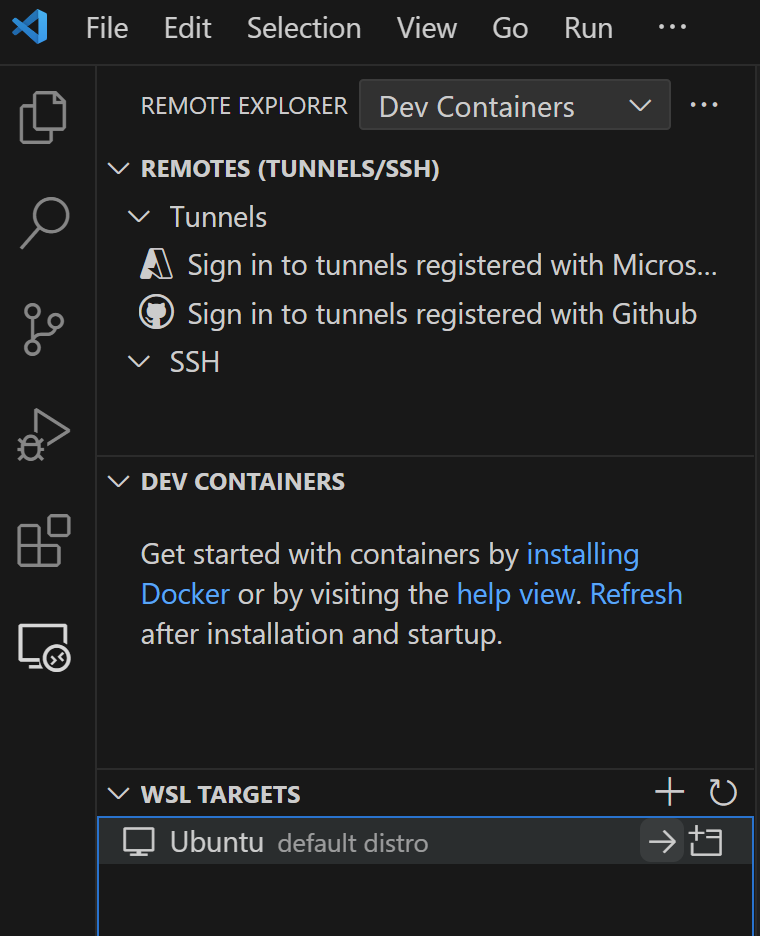

The VS Code program will reload, and in the lower-left corner, the status indicator will change to "WSL: Ubuntu".

What does it mean by "WSL: Ubuntu"? Here are the facts:

- Your VS Code is still running on Windows
- If you open up a terminal by pressing Ctrl + ```, you will see a WSL terminal!
- Try opening a file in VS Code by clicking "File - Open File", you will see a pop
  up menu with a path starting with `/home`. This indicates that you are browsing
  the WSL file system.

So when the VS Code is connected to the WSL Remote (yes, WSL is a remote), you are actually using the WSL environment to develop your code. This makes configured packages and tools available to you.

If your work does not require Windows-only tools or packages, I would recommend using the WSL as a daily driver.

```{note}
Windows-only tools include `psspy` for calling PSS/E, for example.
Code that require Windows-based backend programs has to run on Windows, not WSL. 
```

### Python and autopep8

When connected to the WSL remote, go ahead and install the Python extension in WSL. Also, install a plugin called "autopep8", which is a linter for automatically formatting your code.

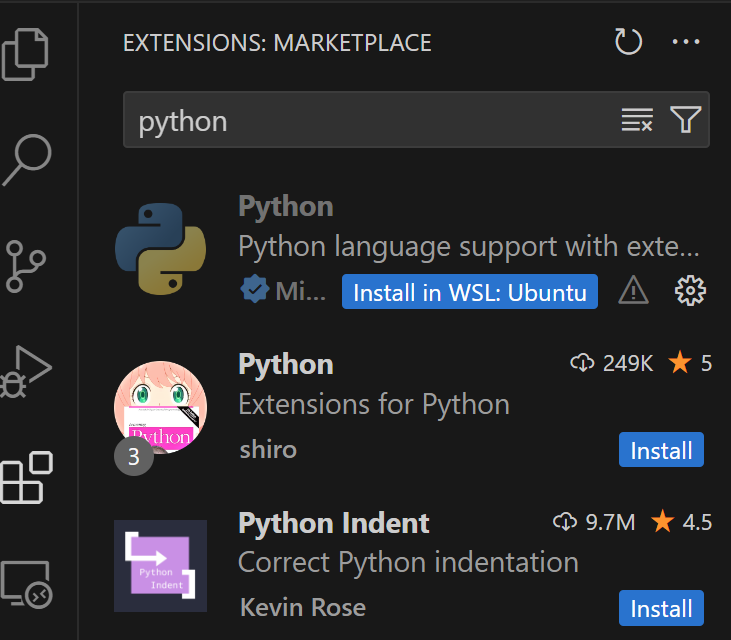

When done, make a temporary folder `mod1` in your home directory. Use VS Code to open the folder. VS Code should automatically reload. You will be asked to trust the authors of the files. Since you created the folder, you can select "Yes, I trust the authors" and proceed.

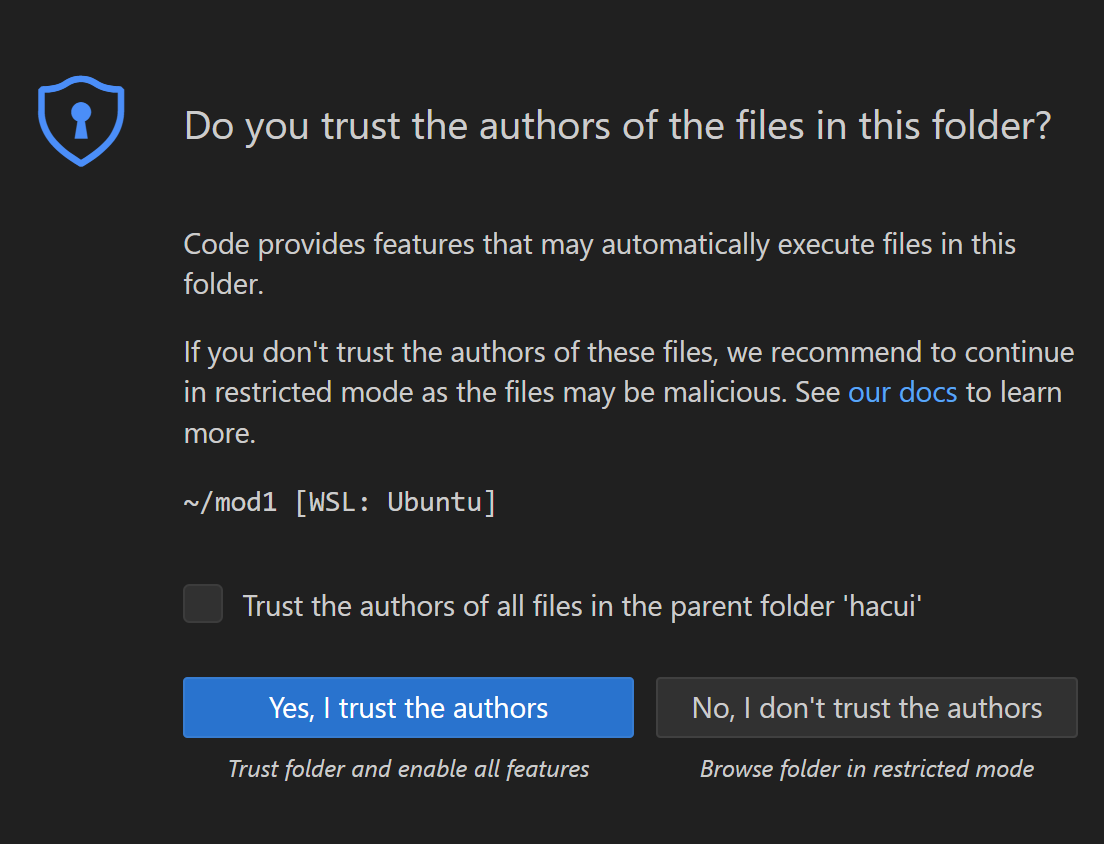

Now, let's start by writing our first Python script.

Open the command palette using `Ctrl + Shift + P`, type "Python: Create New File" (you can also use "File - New File"), and select it (you don't have to type it out full; press enter when highlighted). An editor will open. Paste a Hello World program given below,

```python
print("Hello, World!")
```

Press `Ctrl + s` to save it as helloworld.py.

### Select Interpreter

To run it, the next step is to select the correct Python interpreter. Your WSL will have multiple copies of Python; one shipped with Ubuntu, one in your base envirnment, and one in `pct`.

As an exercise, we want to select the one in `pct`. 

Us the command palette and type "Select interpreter". You will see a list of interpreters, but that might not include the one in `pct`. Select "Enter interpreter path", and type `/home/yourname/miniforge3/envs/pct/bin/python`. You can combine typing and using the arrow keys to nagivate the list. When you find it, press enter to confirm. The next time you check the "Select interpreter" menu, you will see both the system-wide and `pct` python interpreters.

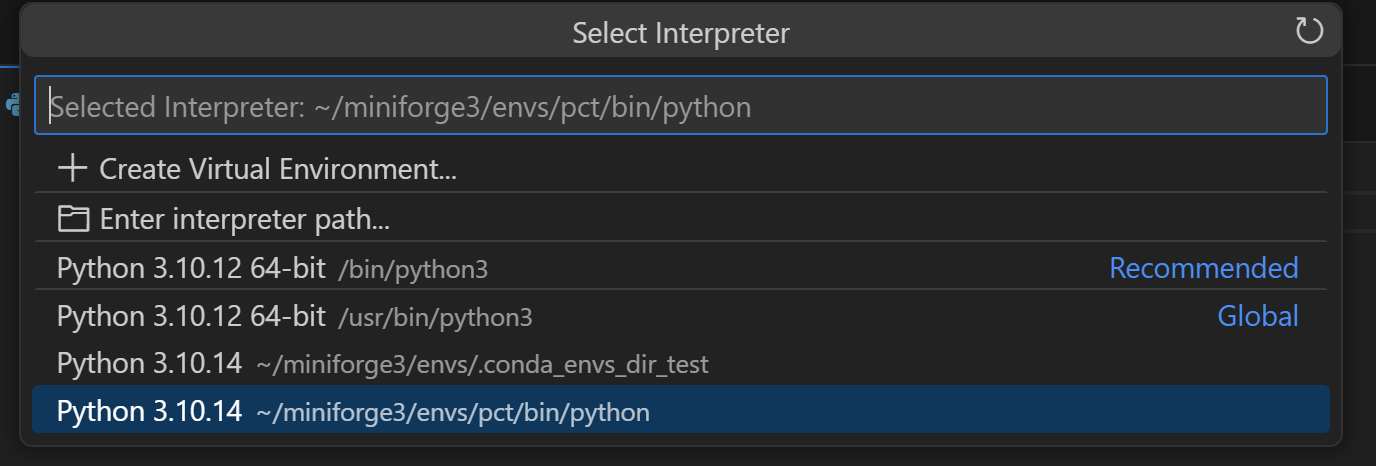

The lower-right corner also has a "Python" badge that you can click on to change the interpreter.

Now let's execute the program. Click the "play" to the left of the file tabs. You will see a terminal at the bottom of the screen. 

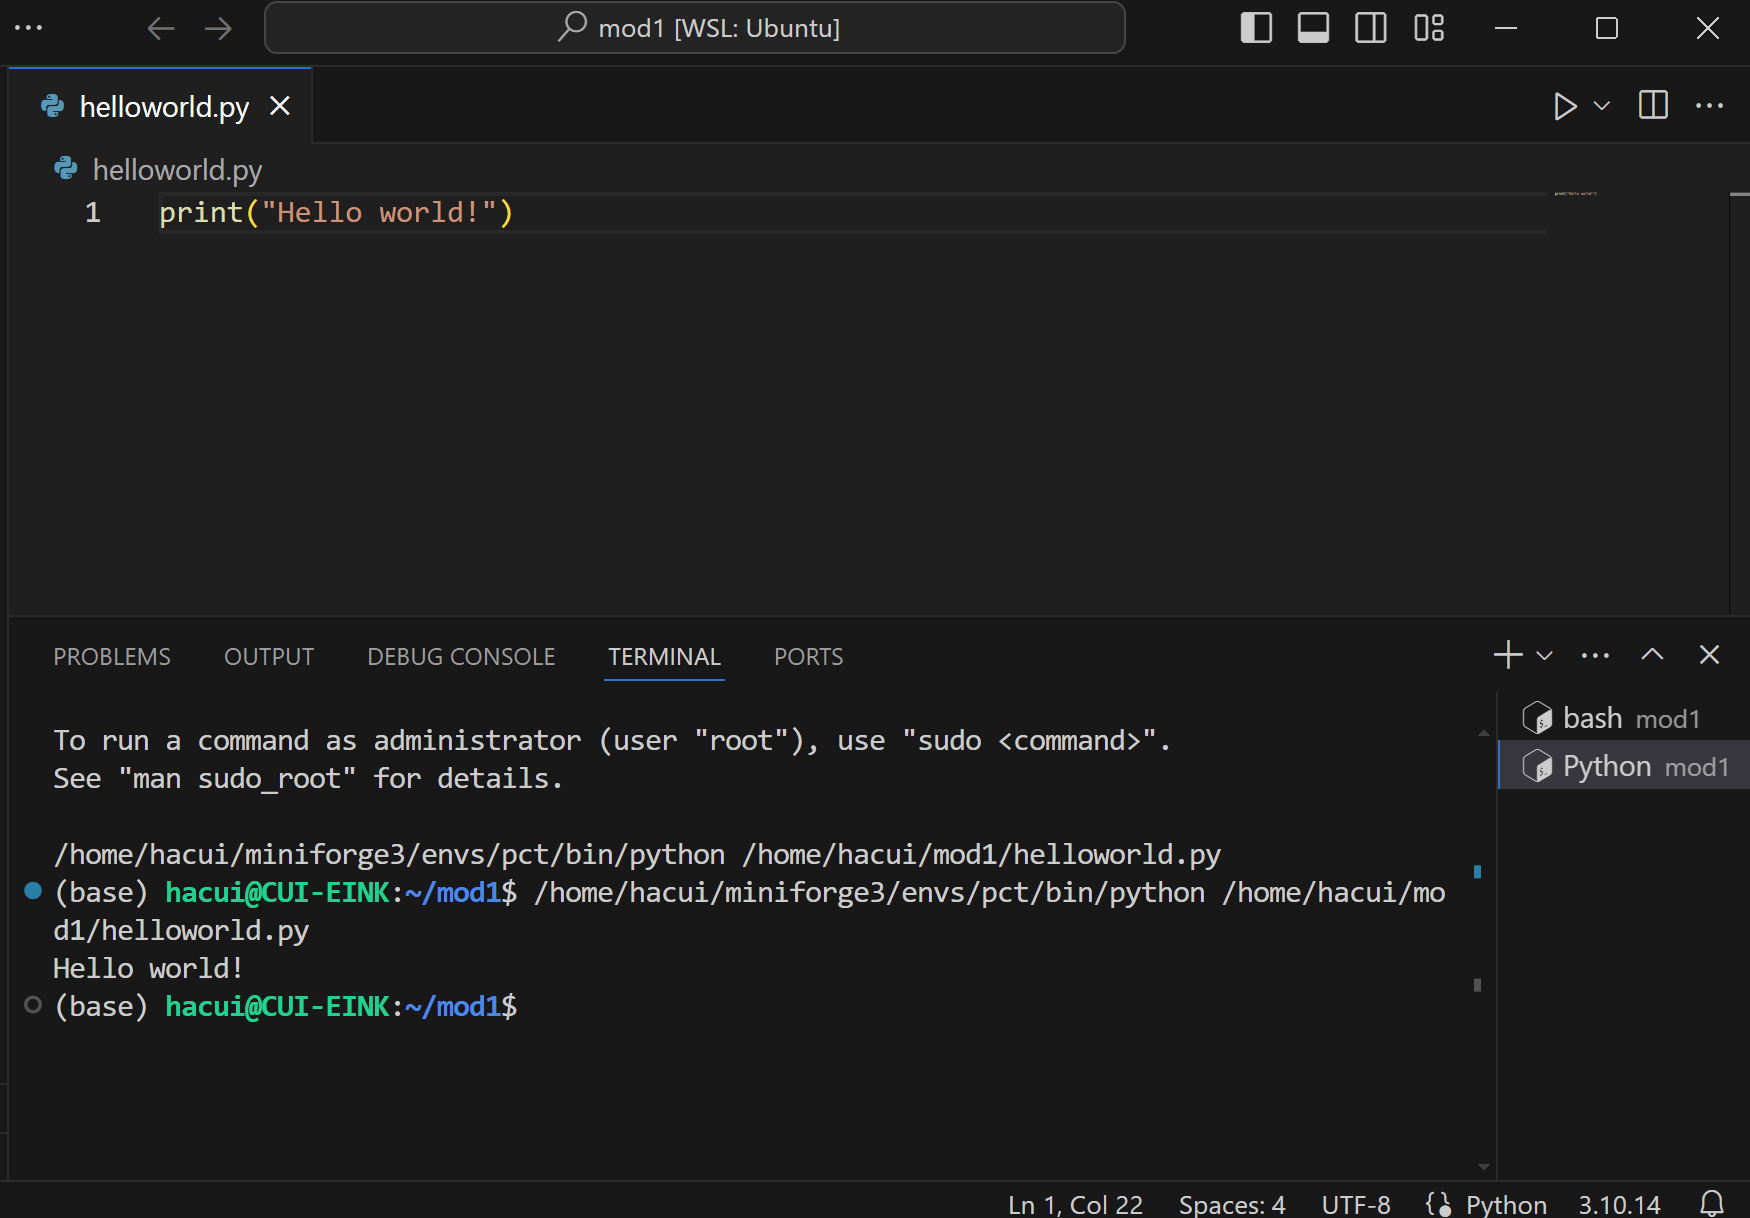

Check for the path to the interpreter in the screenshot. We can confirm that the correct interpreter is used.

```{note}
Why do we need to select different interpreters for different scripts?

Some scripts depend on a particular version of package. You can install the package to the particular environment and use the corresponding interpreter.

```

### Debugger



Now that you know how to run a Python program, we will talk about debugging.

Debugging is the process of finding out where your code is wrong. A debugger is a tool that allows you to step through your code and watch the state of your program. It is particularly useful for troubleshoot complex programs or just to understand the flow of a code base.

We will debug a Fibonacci program to showcase the debugger.

A Fibonacci series has the following formula:

```
F(n) = F(n-1) + F(n-2)
```

where `F(0) = 0` and `F(1) = 1`.

Below is a program that keeps track of a Fibonacci series using memo.

```python
def fibonacci(n, memo={}):
    if n <= 0:
        return 0
    elif n == 1:
        memo[n] = 1
    elif n in memo:
        return memo[n]
    else:
        memo[n] = fibonacci(n-1) + fibonacci(n-2)
        return memo[n]
 
# Driver Program
print(fibonacci(9))
```

Copy the code into `fib.py` and save it. Run it, but it will error out:

```
TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'`
```

Instead of inspecting the code, let's use the debugger to inspect the code. Click on the downward arrow to the right of the run button, select "Python Debugger: Debug Current File". The debugger will stop at the line that has the error.


Next, you will use breakpoints to indicate where you want the debugger to stop. Click on the left margin (to the left of the line number) to set a breakpoint. Set a breakpoint at line 9, and restart the debugger (click the green restart button in the movable debugger toolbar). The debugger will stop at line 9. This time, line 9 has not been executed yet.

The left pane of the debugger contains local variables, watch variables, and call stack. It shows that the starting `n` is 5.

The debugger provides "step into" and "step over" methods. "Step into" will step into the function call and stop at the first line of the function. "Step over" will step over the function call and continue to the next line.

Click Step over (or press key F10) once. You will see a decrease in `n` to 4. Step over twice more to make `n = 2`.

Now, step into it. This will step into `fibonacci(1, memo)`. When completed, it will step into `fibonacci(0, memo)` immediately afterwards. Note what gets returned to the caller.

Finish the debugging process and come up with a fix. Restart the debugger as many times as needed.



### Debugging a package

For more information on debugging, please refer to the [VS Code
documentation](https://code.visualstudio.com/docs/editor/debugging).

You will follow some steps to create a JSON-based configuration.


## Remote Linux Machine

If you have a Linux machine with remote access (ssh), you can use VS Code to connect to it as an alternative to WSL.
Using a remote Linux machine will ensure a consistent development environment, even if you switch between different clients.

For more information, please refer to the [VS Code Remote Development
documentation](https://code.visualstudio.com/docs/remote/remote-overview).
